In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

from sklearn.manifold import TSNE

In [3]:
data = pd.read_excel('all_excel_fixed.xlsx')

In [4]:
df = data.drop(['contender', 'address', 'song'], axis=1)

In [5]:
sexuality_dict = {
    'M':0,
    'F':1,
    'D':2
}

genre_dict = {
    'Thai Country':0,
    'Pop':1,
    'Rock':2,
    'Alternative':3,
    'Country':4,
    'Jazz':5,
    'R&B':6,
    'Soul':5,
    'Acoustic':4,
    'Hip-Hop':3,
    'Blues':5
}

language_dict = {
    'th':0,
    'en':1,
    'jp':2,
    'kr':2,
    'cn':2
}

age_dict = {
    '<20':0,
    '21-29':1,
    '30-39':2,
    '>30':3,
}

In [6]:
def ageClassify(age):
    if age < 20: return '<20'
    elif age <= 40: return '20-40'
    else: return '>40'
    
df['sexuality'] = df['sexuality'].apply(lambda x: sexuality_dict[x])
df['genre'] = df['genre'].apply(lambda x: genre_dict[x])
df['language'] = df['language'].apply(lambda x: language_dict[x])
df['age'] = df['age'].apply(lambda x: ageClassify(x))


In [7]:
# df["num_coach"] = df.apply(lambda row: row[4] + row[5] + row[6] + row[7] + row[8] + row[9], axis = 1) # lambda function to check if they match. row.name gets the index

In [8]:
data_train = df[['sexuality', 'genre', 'language']]
np_data_train = data_train.values

In [9]:
np_data_train_normed = np_data_train / np_data_train.max(axis=0)

In [10]:
embedded = TSNE(n_components=2).fit_transform(np_data_train_normed)

In [11]:
x_tsne = embedded[:,0]
y_tsne = embedded[:,1]
embedded_df = pd.DataFrame({'x':x_tsne, 'y':y_tsne})

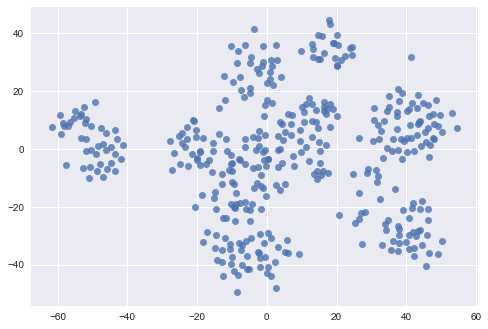

In [12]:
sns.regplot(x=x_tsne, y=y_tsne, fit_reg=False)
plt.show()

In [13]:
embedded_df = pd.DataFrame({'x':x_tsne, 'y':y_tsne})

In [14]:
concat_tsne_df = pd.concat([df,embedded_df],axis=1)

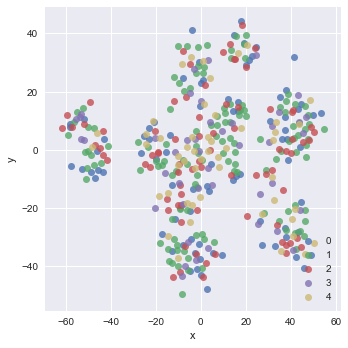

In [15]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=False, hue='num_coach_sel', legend=False)
plt.legend(loc='lower right')
plt.show()

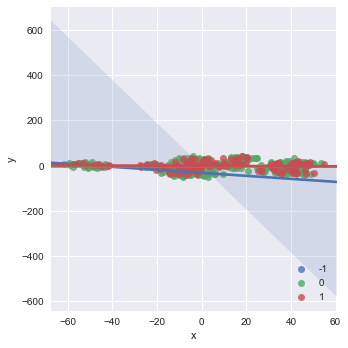

In [16]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Joey', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

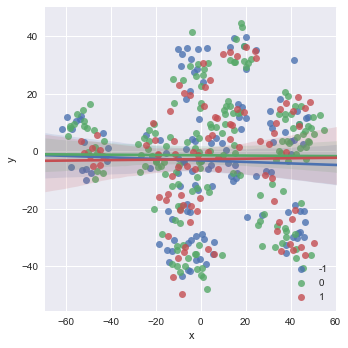

In [17]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Kim', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

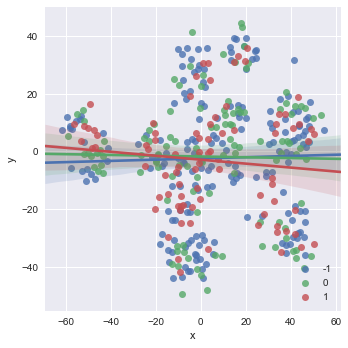

In [18]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Stamp', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

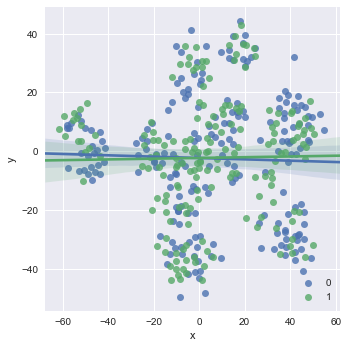

In [19]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Kong', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

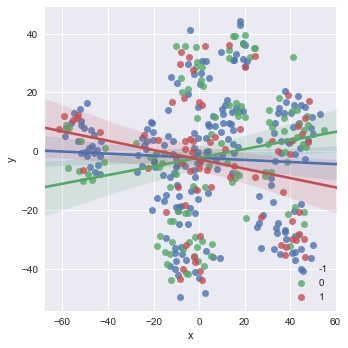

In [20]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Singto', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

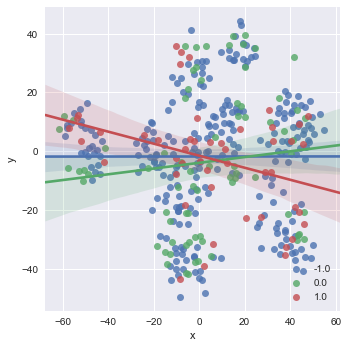

In [21]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Da', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

In [22]:
from kmodes.kmodes import KModes

ModuleNotFoundError: No module named 'kmodes'

In [319]:
km = KModes(n_clusters=6, init='Huang', n_init=100, verbose=1)

clusters = km.fit_predict(data_train)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 47, cost: 255.0
Run 1, iteration: 2/100, moves: 0, cost: 255.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 257.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 53, cost: 270.0
Run 3, iteration: 2/100, moves: 0, cost: 270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 149, cost: 233.0
Run 4, iteration: 2/100, moves: 6, cost: 233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 317.0
Run 5, iteration: 2/100, moves: 0, cost: 317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 274.0
Init: initializing centroids
Init: initializi

Init: initializing clusters
Starting iterations...
Run 52, iteration: 1/100, moves: 15, cost: 256.0
Run 52, iteration: 2/100, moves: 0, cost: 256.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 53, iteration: 1/100, moves: 14, cost: 249.0
Run 53, iteration: 2/100, moves: 0, cost: 249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 54, iteration: 1/100, moves: 7, cost: 266.0
Run 54, iteration: 2/100, moves: 0, cost: 266.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 55, iteration: 1/100, moves: 42, cost: 243.0
Run 55, iteration: 2/100, moves: 0, cost: 243.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 56, iteration: 1/100, moves: 1, cost: 268.0
Run 56, iteration: 2/100, moves: 0, cost: 268.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 57, iteration: 1/100, moves: 11, cost: 260.0
Run 57, iteration

Best run was number 92
[[1 1 0]
 [1 0 0]
 [0 1 1]
 [0 2 0]
 [0 1 0]
 [1 1 1]]


In [320]:
cluster_df = pd.DataFrame({'cluster': clusters})

In [321]:
concat_df = pd.concat([df,cluster_df],axis=1)

In [404]:
# sns.stripplot(x="cluster", y="Joey", hue='sexuality', data=concat_df, jitter=True);
# plt.show()

In [405]:
# sns.stripplot(x="sexuality", y="Joey", data=concat_df, jitter=True);
# plt.show()

In [406]:
# sns.stripplot(x="genre", y="num_coach_sel", data=concat_df, jitter=True);
# plt.show()

In [407]:
# sns.stripplot(x="genre", y="Joey", data=concat_df, jitter=True);
# plt.show()

In [408]:
# sns.stripplot(x="genre", y="Stamp", data=concat_df, jitter=True);
# plt.show()

In [409]:
# sns.stripplot(x="genre", y="Stamp", data=concat_df, jitter=True);
# plt.show()

In [410]:
# sns.stripplot(x="genre", y="Kim", data=concat_df, jitter=True);
# plt.show()

In [411]:
# sns.stripplot(x="genre", y="Singto", data=concat_df, jitter=True);
# plt.show()

## Coach Stats:  Percentage of Sexuality corresponding to Hitting Rate (WRONG ?)

In [23]:
Kong_df = df.loc[df['Kong'] == 1]
Kim_df = df.loc[df['Kim'] == 1]
Joey_df = df.loc[df['Joey'] == 1]
Stamp_df = df.loc[df['Stamp'] == 1]
Singto_df = df.loc[df['Singto'] == 1]
Da_df = df.loc[df['Da'] == 1]

dataframe_set = {
    'Kong':Kong_df,
    'Kim':Kim_df,
    'Joey':Joey_df,
    'Stamp':Stamp_df,
    'Singto':Singto_df,
    'Da':Da_df
}

coach_list = [
    'Kong',
    'Kim',
    'Joey',
    'Stamp',
    'Singto',
    'Da',
]

In [403]:
# sns.set_style("whitegrid")
# print('Percentage of Team Members Correspinding to Sexuality \n')
# for coach in coach_list:
#     sexuality_count = (dataframe_set[coach].groupby(['Kong'])['sexuality']
#                          .value_counts(normalize=True)
#                          .rename('percentage')
#                          .mul(100)
#                          .reset_index()
#                          .sort_values('sexuality'))
#     print(coach)
#     sns.barplot(x="sexuality", y="percentage", data=sexuality_count)
#     plt.show()

## Coach Stats: Pick Rate Corresponding to Sexuality

In [24]:
temp = ""

In [25]:
coach_list

['Kong', 'Kim', 'Joey', 'Stamp', 'Singto', 'Da']

Kong
   sexuality  Kong  percentage
0          0     1   50.574713
3          1     1   43.367347
5          2     1   50.000000


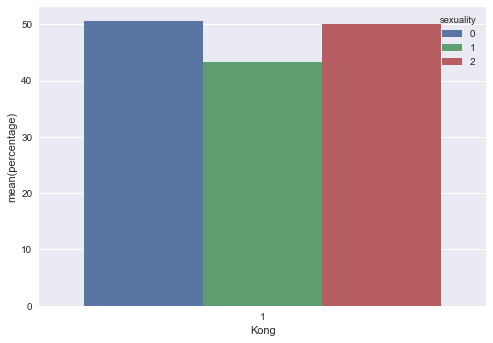

In [26]:
# for coach in coach_list:
coach = 'Kong'
print(coach)
percentage_count = (df.loc[df[coach] != -1].groupby(['sexuality'])[coach]
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(coach))
print(percentage_count.loc[percentage_count[coach] == 1])
sns.barplot(x=coach, y="percentage", hue="sexuality", data=percentage_count.loc[percentage_count[coach] == 1])
plt.show()

Kong
   sexuality  Kong  percentage
0          0     1   50.574713
3          1     1   43.367347
5          2     1   50.000000


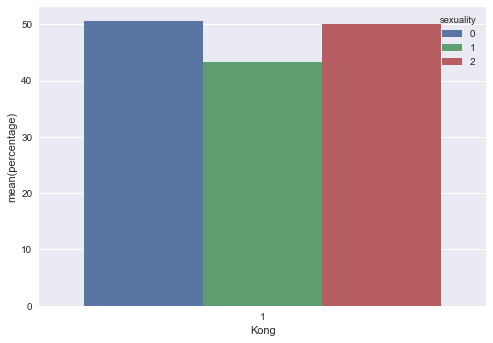

Kim
   sexuality  Kim  percentage
1          0    1   37.719298
3          1    1   33.812950
5          2    1   16.666667


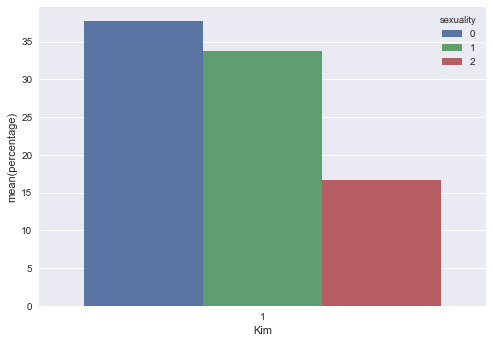

Joey
   sexuality  Joey  percentage
1          0     1   34.302326
3          1     1   40.816327
5          2     1   27.777778


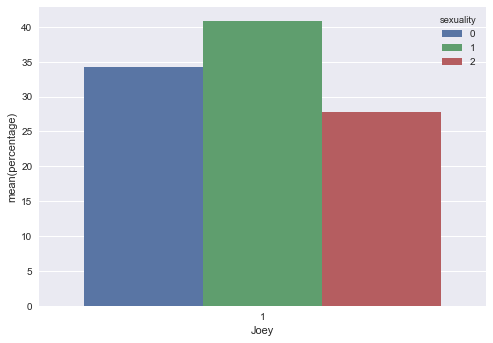

Stamp
   sexuality  Stamp  percentage
1          0      1   47.191011
3          1      1   39.215686
5          2      1   33.333333


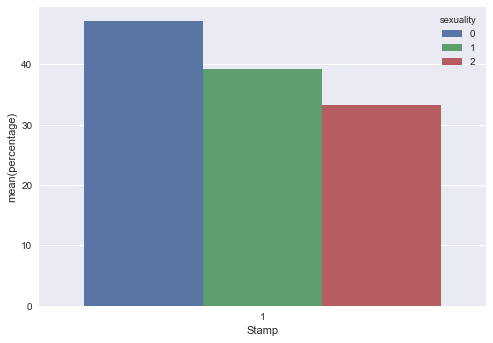

Singto
   sexuality  Singto  percentage
1          0       1   40.000000
3          1       1   42.553191
5          2       1   11.111111


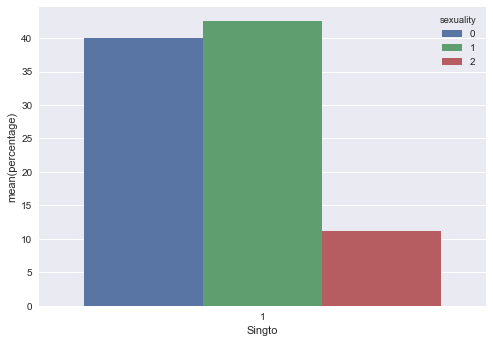

Da
   sexuality   Da  percentage
1          0  1.0   33.333333
3          1  1.0   45.614035
5          2  1.0   33.333333


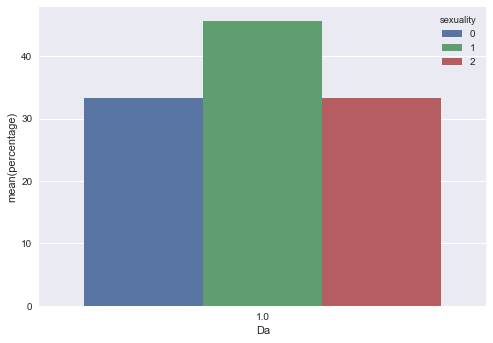

In [27]:
for coach in coach_list:
    print(coach)
    percentage_count = (df.loc[df[coach] != -1].groupby(['sexuality'])[coach]
                             .value_counts(normalize=True)
                             .rename('percentage')
                             .mul(100)
                             .reset_index()
                             .sort_values(coach))
    print(percentage_count.loc[percentage_count[coach] == 1])
    sns.barplot(x=coach, y="percentage", hue="sexuality", data=percentage_count.loc[percentage_count[coach] == 1])
    plt.show()

## Coach Stats: Pick Rate Corresponding to Genre

In [1]:
for coach in range(0,1):
    print(coach)
    percentage_count = (df.loc[df[coach] != -1].groupby(['genre'])[coach]
                             .value_counts(normalize=True)
                             .rename('percentage')
                             .mul(100)
                             .reset_index()
                             .sort_values(coach))
    sns.barplot(x=coach, y="percentage", hue="genre", data=percentage_count.loc[percentage_count[coach] == 1])
    plt.show()

0


NameError: name 'df' is not defined

Kong


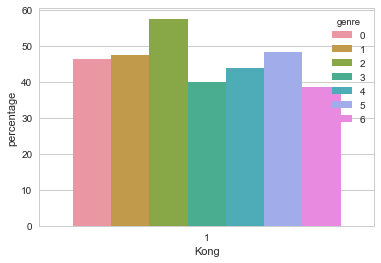

Kim


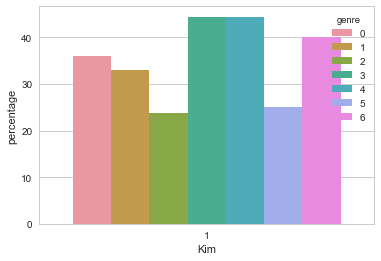

Joey


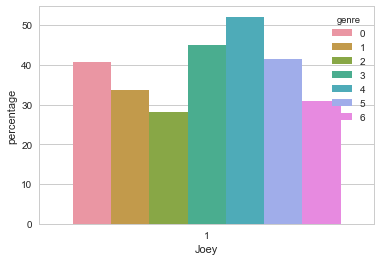

Stamp


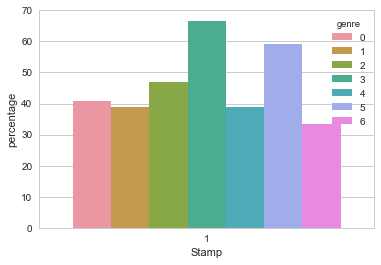

Singto


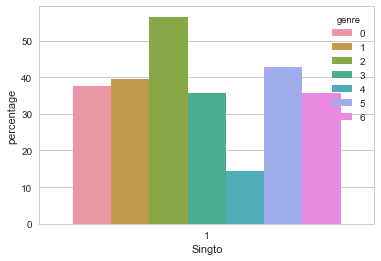

Da


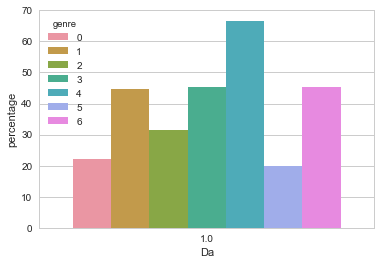

In [458]:
for coach in coach_list:
    print(coach)
    percentage_count = (df.loc[df[coach] != -1].groupby(['genre'])[coach]
                             .value_counts(normalize=True)
                             .rename('percentage')
                             .mul(100)
                             .reset_index()
                             .sort_values(coach))
    sns.barplot(x=coach, y="percentage", hue="genre", data=percentage_count.loc[percentage_count[coach] == 1])
    plt.show()

In [459]:
df['genre'].value_counts()

1    171
0     54
4     48
2     40
5     29
6     26
3     20
Name: genre, dtype: int64

## Coach Stats: Pick Rate Corresponding to Language

Kong


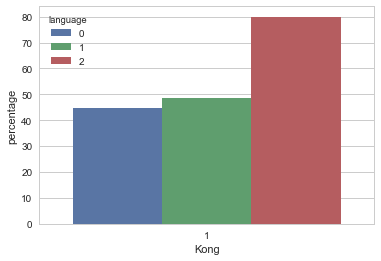

Kim


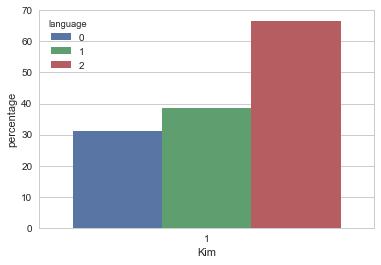

Joey


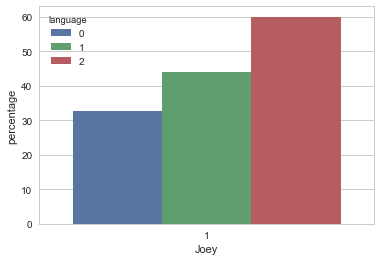

Stamp


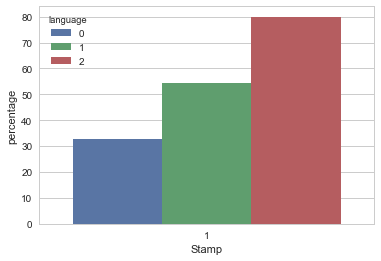

Singto


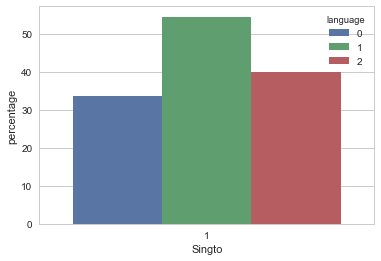

Da


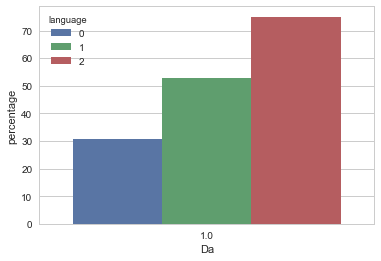

In [488]:
for coach in coach_list:
    print(coach)
    percentage_count = (df.loc[df[coach] != -1].groupby(['language'])[coach]
                             .value_counts(normalize=True)
                             .rename('percentage')
                             .mul(100)
                             .reset_index()
                             .sort_values(coach))
    sns.barplot(x=coach, y="percentage", hue="language", data=percentage_count.loc[percentage_count[coach] == 1])
    plt.show()

## Coach Stats: Pick Rate Corresponding to Age

Kong


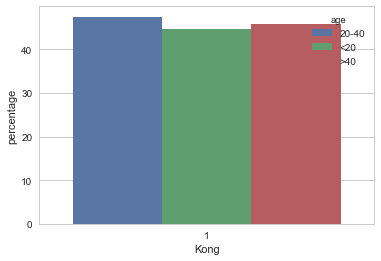

Kim


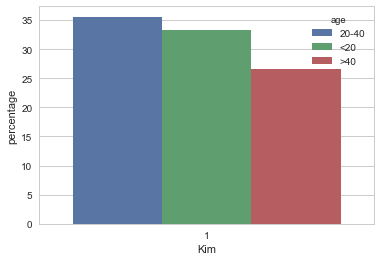

Joey


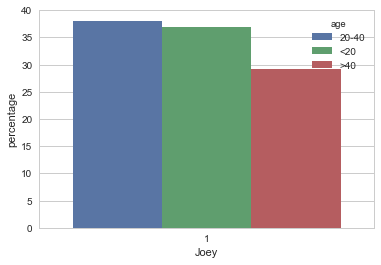

Stamp


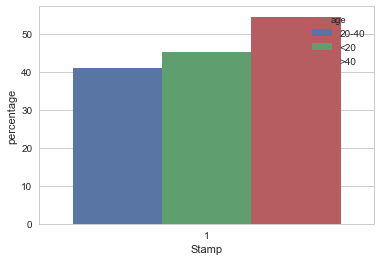

Singto


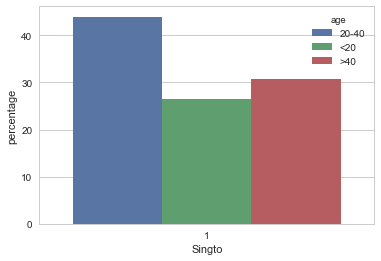

Da


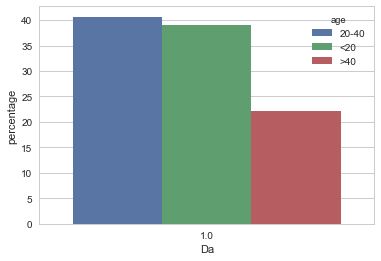

In [475]:
for coach in coach_list:
    print(coach)
    percentage_count = (df.loc[df[coach] != -1].groupby(['age'])[coach]
                             .value_counts(normalize=True)
                             .rename('percentage')
                             .mul(100)
                             .reset_index()
                             .sort_values(coach))
    sns.barplot(x=coach, y="percentage", hue="age", data=percentage_count.loc[percentage_count[coach] == 1])
    plt.show()

## General Stats: Avg. Num Coach Sel per Genre

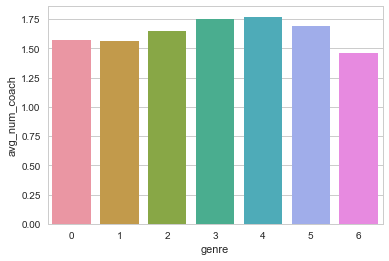

In [484]:
avg_genre = (df.loc[df[coach] != -1].groupby(['genre'])['num_coach_sel']
                         .mean()
                         .rename('avg_num_coach')
                         .reset_index())
sns.barplot(x="genre", y="avg_num_coach", data=avg_genre)
plt.show()

## General Stats: Avg. Num Coach Sel per Sexuality

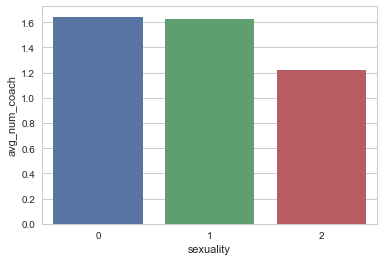

In [486]:
avg_sexuality = (df.loc[df[coach] != -1].groupby(['sexuality'])['num_coach_sel']
                         .mean()
                         .rename('avg_num_coach')
                         .reset_index())
sns.barplot(x="sexuality", y="avg_num_coach", data=avg_sexuality)
plt.show()

## General Stats: Avg. Num Coach Sel per Age

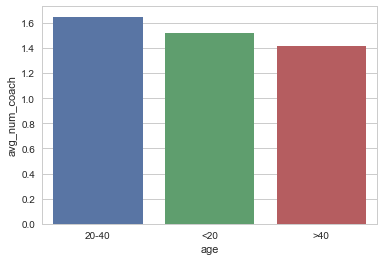

In [487]:
avg_age = (df.loc[df[coach] != -1].groupby(['age'])['num_coach_sel']
                         .mean()
                         .rename('avg_num_coach')
                         .reset_index())
sns.barplot(x="age", y="avg_num_coach", data=avg_age)
plt.show()

## General Stats: Avg. Num Coach Sel per Language

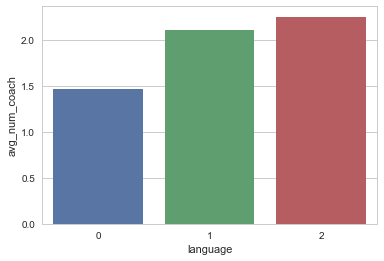

In [490]:
avg_language = (df.loc[df[coach] != -1].groupby(['language'])['num_coach_sel']
                         .mean()
                         .rename('avg_num_coach')
                         .reset_index())
sns.barplot(x="language", y="avg_num_coach", data=avg_language)
plt.show()

## Coach Stats: Overall Push Rate

In [533]:
for coach in coach_list:
    pick_rate = (df.loc[df[coach] != -1].groupby([coach])
                            .size()
                            .div(len(df.loc[df[coach] != -1].values)))
    print(pick_rate)

Kong
0    0.530928
1    0.469072
dtype: float64
Kim
0    0.65283
1    0.34717
dtype: float64
Joey
0    0.626943
1    0.373057
dtype: float64
Stamp
0    0.575
1    0.425
dtype: float64
Singto
0    0.601064
1    0.398936
dtype: float64
Da
0.0    0.600
1.0    0.384
dtype: float64


In [540]:
df.loc[df['Coach'] != ]

NameError: name 'NULL' is not defined

In [554]:
pick_rate = df.groupby(['genre']).size()
df.loc[df['num_coach_sel'] != 0]

,sexuality,age,genre,language,Kong,Kim,Joey,Stamp,Singto,Da,Coach,num_coach_sel
0,0,20-40,1,0,1,1,0,0,-1,-1.0,Kim,2
1,1,20-40,4,0,0,0,1,0,-1,-1.0,Joey,1
2,0,20-40,1,1,1,1,1,1,-1,-1.0,Joey,4
4,0,<20,1,0,1,0,0,0,-1,-1.0,Kong,1
5,1,20-40,6,0,0,0,1,0,-1,-1.0,Joey,1
6,2,20-40,4,0,1,0,0,0,-1,-1.0,Kong,1
8,0,20-40,2,1,1,1,1,1,-1,-1.0,Stamp,4
9,1,>40,5,1,1,1,1,1,-1,-1.0,Joey,4
11,0,20-40,0,0,0,1,1,0,-1,-1.0,Joey,2
12,1,20-40,0,0,0,0,0,1,-1,-1.0,Stamp,1


In [555]:
pick_rate

genre
0     54
1    171
2     40
3     20
4     48
5     29
6     26
dtype: int64